In [10]:
import numpy as np
data1 = np.loadtxt('vela_Pulsar.mbr')

Loading the Vela Pulsar Data

In [166]:
north_data = data1[:,[0]]
south_data = data1[:,[1]]
north_data = np.array(north_data,dtype = complex)
south_data = np.array(south_data,dtype = complex)


Making Matrix of dimention $512 \times 60000$

In [167]:
north_data = np.reshape(north_data,(512,60000),order = 'F')
south_data = np.reshape(south_data,(512,60000),order = 'F')

Here we are calculating $FFT(data)$ of every column and taking their square of absolute value i.e. $|FFT|^2$

In [168]:
# north_fft = np.zeros(512,60000)
# south_fft = np.zeros(512,60000)
for i in range(0,len(north_data[0])):
    north_data[:,i] = np.power(np.abs(np.fft.fft(north_data[:,i])),2)
    south_data[:,i] = np.power(np.abs(np.fft.fft(np.reshape(south_data[:,[i]],(1,512)))),2)

# north_data = north_data.astype(float)
# south_data = south_data.astype(float)
# for i in range(0,999):
  


Reducing noise by taking average of every 60 elements....

In [175]:
north_fft = np.zeros((512,1000))
south_fft = np.zeros((512,1000))
for i in range(0,1000):
    north_fft[:,i] = np.sum(np.real(north_data[:,60*i:60*(i+1)-1]),axis = 1)
    south_fft[:,i] = np.sum(np.real(south_data[:,60*i:60*(i+1)-1]),axis = 1)


Plotting The Matrix

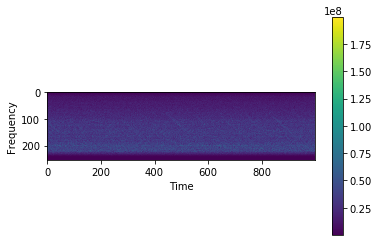

In [176]:
from matplotlib import pyplot as plt
plt.imshow(north_fft[0:255,:]);
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

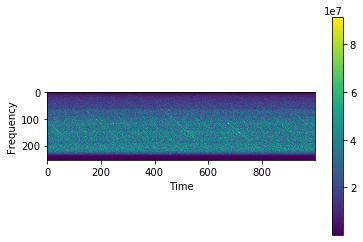

In [177]:
from matplotlib import pyplot as plt
plt.imshow(south_fft[0:255,:]);
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

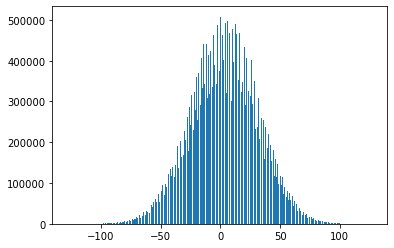

In [184]:
hist_north = data1[:,[0]]
plt.hist(hist_north,bins = 350)
plt.show()

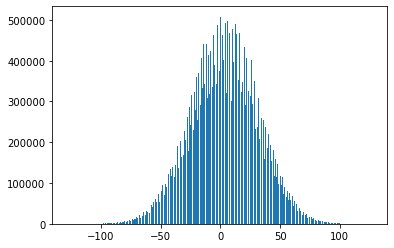

In [186]:
hist_south = data1[:,[1]]
plt.hist(hist_north,bins = 350)
plt.show()